In [1]:
import matplotlib.pyplot as plt
import numpy as np

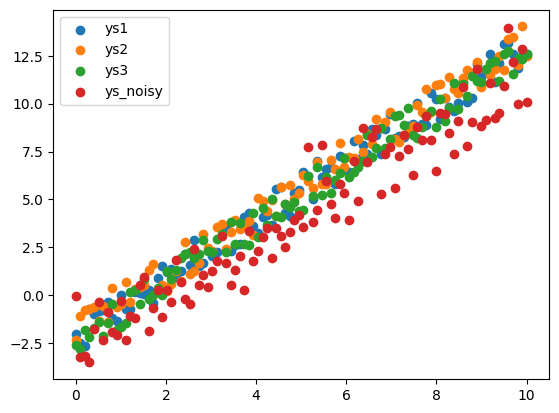

In [2]:
# ys1, ys2, ys3 - качественные данные, ys_noisy - датасет с шумом

xs = np.linspace(0, 10, 100)
ys1 = 1.5 * xs + np.random.random(100)*2 - 3
ys2 = 1.5 * xs + np.random.random(100)*2 - 2.8
ys3 = 1.5 * xs + np.random.random(100)*2 - 3.2
ys_noisy = ys1 + np.random.normal(loc=0, scale=1, size=len(xs)) - 1


plt.scatter(x=xs, y=ys1, label='ys1')
plt.scatter(x=xs, y=ys2, label='ys2')
plt.scatter(x=xs, y=ys3, label='ys3')
plt.scatter(x=xs, y=ys_noisy, label='ys_noisy')
plt.legend()
plt.show()

Mean squared error: 0.34
Coefficient of determination: 0.98
Coefficients:  [1.49274529]


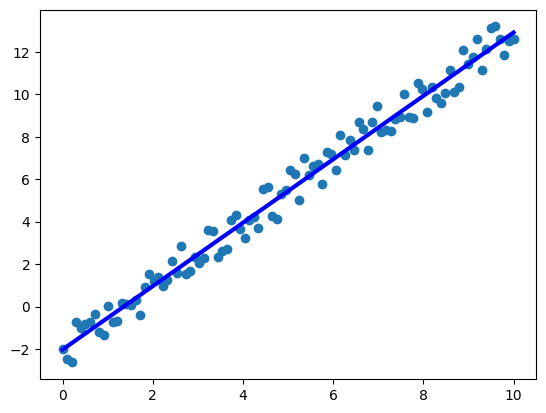

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score

# Создаем и обучаем модель линейной регрессии на первом датассете ys1
reg = LinearRegression()
reg.fit(xs.reshape(-1, 1), ys1)
approx = reg.predict(xs.reshape(-1, 1))

print('Mean squared error: %.2f' % mse(ys1, approx))
print('Coefficient of determination: %.2f' % r2_score(ys1, approx))
print('Coefficients: ', reg.coef_)

plt.scatter(xs, ys1)
plt.plot(xs.reshape(-1, 1), approx, color='blue', linewidth=3)
plt.show()
np.savetxt('datasets/ys1.csv', ys1, delimiter=',')
np.savetxt('datasets/ys2.csv', ys2, delimiter=',')
np.savetxt('datasets/ys3.csv', ys3, delimiter=',')
np.savetxt('datasets/ys_noisy.csv', ys_noisy, delimiter=',')
np.savetxt('datasets/approx.csv', approx, delimiter=',')

In [4]:
%%writefile test_score.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse, r2_score

@pytest.fixture()
def load_ys(request):
    file_name = request.param
    ys = np.loadtxt(file_name, delimiter=',')
    return ys

@pytest.fixture()
def load_approx():
    approx = np.loadtxt('datasets/approx.csv', delimiter=',')
    return approx

@pytest.mark.parametrize('load_ys', ['datasets/ys1.csv', 'datasets/ys2.csv', 'datasets/ys3.csv', 'datasets/ys_noisy.csv'], indirect=True)
def test_mse(load_ys, load_approx):
    assert mse(load_ys, load_approx) < 0.5, mse(load_ys, load_approx)

@pytest.mark.parametrize('load_ys', ['datasets/ys1.csv', 'datasets/ys2.csv', 'datasets/ys3.csv', 'datasets/ys_noisy.csv'], indirect=True)
def test_r2(load_ys, load_approx):
    assert r2_score(load_ys, load_approx) > 0.9, r2_score(load_ys, load_approx)


Overwriting test_score.py


In [5]:
!pytest -v test_score.py

============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-8.2.0, pluggy-1.5.0 -- C:\Program Files\Python311\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\sedir\Desktop\study\MLOps\Practice5
plugins: anyio-4.3.0, hydra-core-1.3.2
collecting ... collected 8 items

test_score.py::test_mse[datasets/ys1.csv] PASSED                         [ 12%]
test_score.py::test_mse[datasets/ys2.csv] PASSED                         [ 25%]
test_score.py::test_mse[datasets/ys3.csv] PASSED                         [ 37%]
test_score.py::test_mse[datasets/ys_noisy.csv] FAILED                    [ 50%]
test_score.py::test_r2[datasets/ys1.csv] PASSED                          [ 62%]
test_score.py::test_r2[datasets/ys2.csv] PASSED                          [ 75%]
test_score.py::test_r2[datasets/ys3.csv] PASSED                          [ 87%]
test_score.py::test_r2[datasets/ys_noisy.csv] FAILED                     [100%]

===========================

Mean squared error: 2.83
Coefficient of determination: 0.85


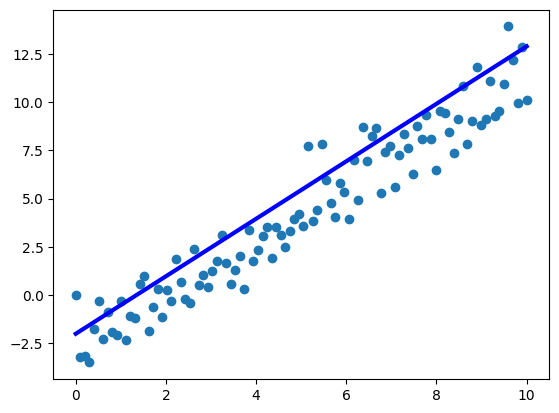

In [6]:
print('Mean squared error: %.2f' % mse(ys_noisy, approx))
print('Coefficient of determination: %.2f' % r2_score(ys_noisy, approx))

plt.scatter(xs, ys_noisy)
plt.plot(xs.reshape(-1, 1), approx, color='blue', linewidth=3)
plt.show()